In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [2]:
plt.style.use('ggplot')

In [3]:
df=pd.read_csv(r"C:\Users\Basel\Desktop\Data Analysis Projects\Movie Portofilio Project\movies.csv")

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<Axes: >

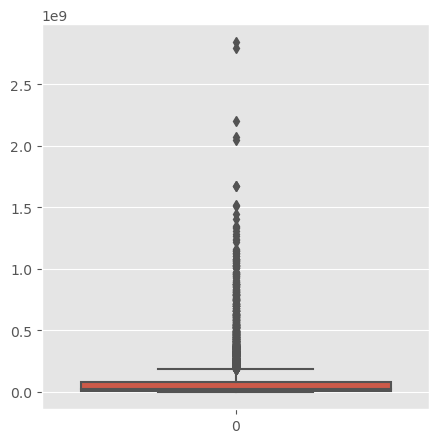

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(df['gross'])

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.sort_values(by='gross',ascending=False,inplace=True)

<Axes: xlabel='budget', ylabel='gross'>

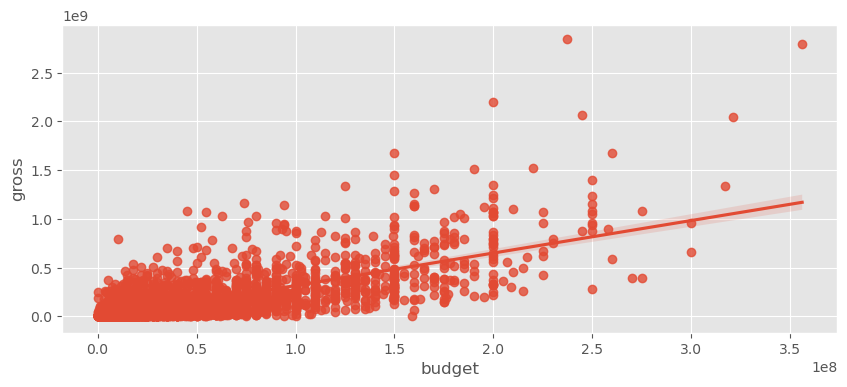

In [10]:
plt.figure(figsize=(10,4))
sns.regplot(x='budget',y='gross',data=df)

<Axes: xlabel='score', ylabel='budget'>

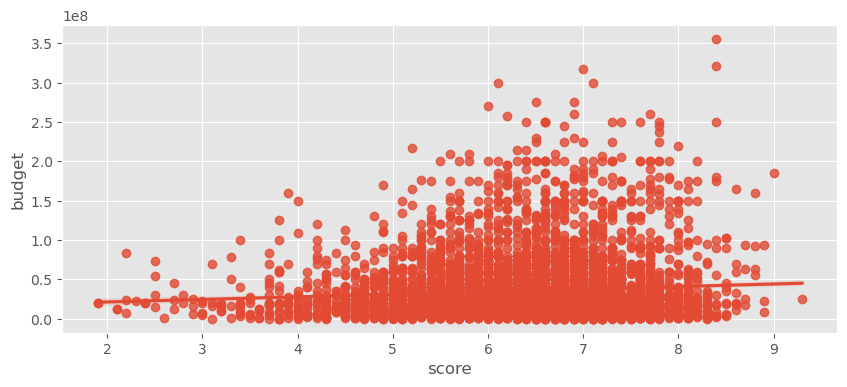

In [11]:
plt.figure(figsize=(10,4))
sns.regplot(x='score',y='budget',data=df)

<Axes: xlabel='score', ylabel='gross'>

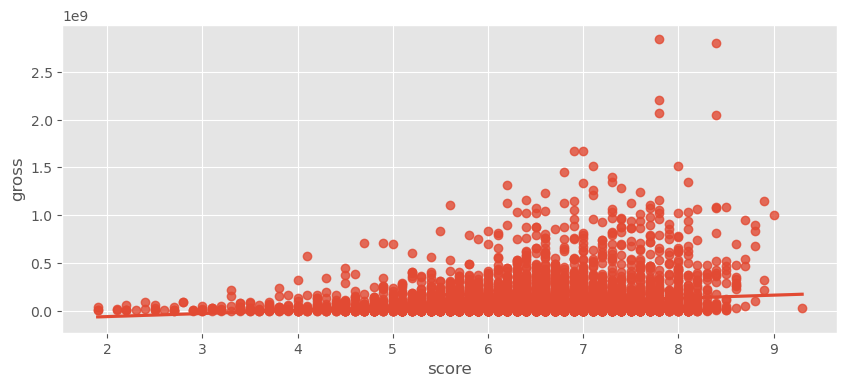

In [12]:
plt.figure(figsize=(10,4))
sns.regplot(x='score',y='gross',data=df)

In [13]:
df.select_dtypes('number').corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


<Axes: >

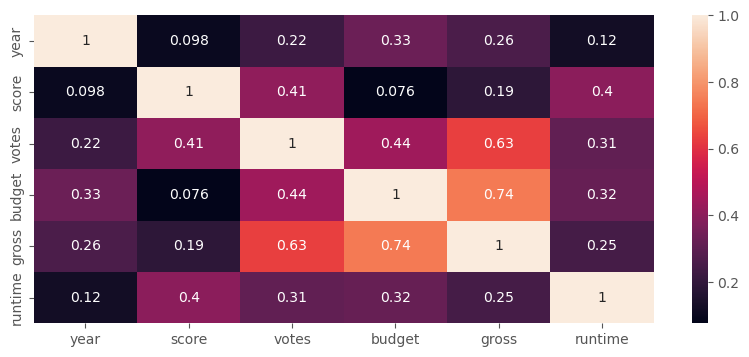

In [14]:
plt.figure(figsize=(10,4))
correlation_matrix=df.select_dtypes('number').corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

In [15]:
CompanyGrossSum=df.groupby('company')[['gross']].sum()

In [16]:
CompanyGrossSumSorted=CompanyGrossSum.sort_values(['gross','company'],ascending=False)[:15]

In [17]:
CompanyGrossSumSorted=CompanyGrossSumSorted.astype('int64')

In [18]:
CompanyGrossSumSorted

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [19]:
df[['released']].astype(str)

,released
5445,"December 18, 2009 (United States)"
7445,"April 26, 2019 (United States)"
3045,"December 19, 1997 (United States)"
6663,"December 18, 2015 (United States)"
7244,"April 27, 2018 (United States)"
...,...
7663,"October 23, 2020 (United States)"
7664,"February 7, 2020 (United States)"
7665,"April 27, 2020 (Cameroon)"
7666,"October 1, 2020 (United States)"


In [20]:
CompanyGrossSum=df.groupby(['company','year'])[['gross']].sum()

In [21]:
CompanyGrossSum=CompanyGrossSum.sort_values(['gross','company','year'],ascending=False)[:15]

In [22]:
CompanyGrossSum['gross']=CompanyGrossSum['gross'].astype('int64')

In [23]:
CompanyGrossSum

gross
company               year            
Walt Disney Pictures  2019  5773131804
Marvel Studios        2018  4018631866
Universal Pictures    2015  3834354888
Twentieth Century Fox 2009  3793491246
Walt Disney Pictures  2017  3789382071
Paramount Pictures    2011  3565705182
Warner Bros.          2010  3300479986
                      2011  3223799224
Walt Disney Pictures  2010  3104474158
Paramount Pictures    2014  3071298586
Columbia Pictures     2006  2934631933
                      2019  2932757449
Marvel Studios        2019  2797501328
Warner Bros.          2018  2774168962
Columbia Pictures     2011  2738363306

In [24]:
CompanyGrossSum=df.groupby('company')[['gross']].sum()
CompanyGrossSumSorted=CompanyGrossSum.sort_values(['gross','company'],ascending=False)[:15]
CompanyGrossSumSorted['gross']=CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


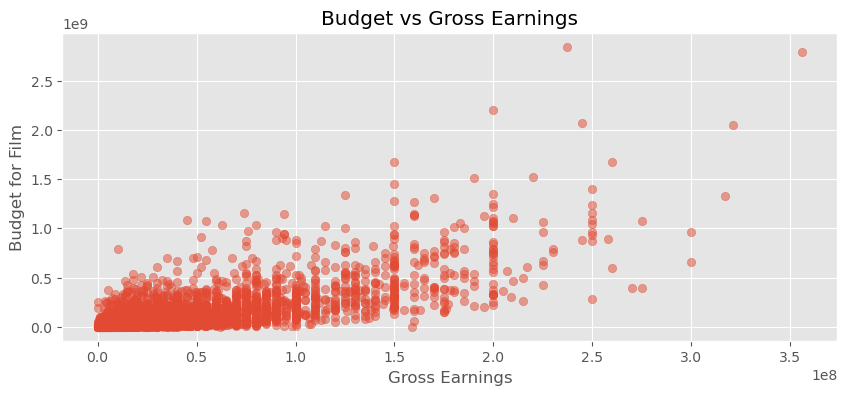

In [25]:
plt.figure(figsize=(10,4))
plt.scatter(x=df['budget'],y=df['gross'],alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [26]:
df_nummerized=df

In [27]:
for col in df_nummerized.columns:
    if(df_nummerized[col].dtype=='object'):
        df_nummerized[col]=df_nummerized[col].astype('category')
        df_nummerized[col]=df_nummerized[col].cat.codes

In [28]:
df_nummerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


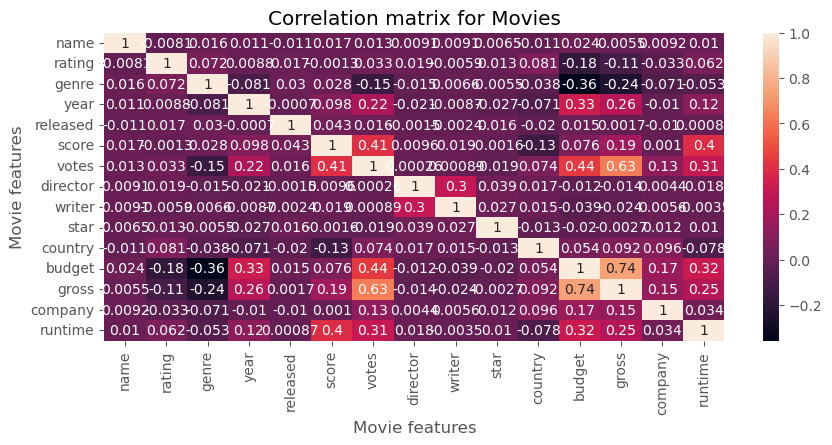

In [29]:
plt.figure(figsize=(10,4))

correlation_matrix = df_nummerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [30]:
correlation_matrix[['gross']]

,gross
name,0.005533
rating,-0.107339
genre,-0.235650
year,0.257486
released,0.001659
score,0.186258
votes,0.630757
director,-0.014441
writer,-0.023519
star,-0.002717


In [31]:
correlation_matrix[['gross']][correlation_matrix['gross']>0.2]

,gross
year,0.257486
votes,0.630757
budget,0.740395
gross,1.000000
runtime,0.245216


In [32]:
df_nummerized2=df.apply(lambda x: x.astype('category') if x.dtype=='object' else x)

In [33]:
df_nummerized2.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174
